# 6 Naive Bayes 课堂练习

姓名：华勤达

学号：2018212212229

贷款违约数据集来自Kaggle数据科学竞赛平台2011年的一个竞赛项目“Give Me Some Cerdit”，该数据集共包含25000个样本，其中150000个样本作为训练集，100000个样本用作测试集。

该训练集共有150000条借款人的历史数据，其中违约样本10026条，占样本总量的6.684%，贷款违约率为6.684%，未违约样本139974条，占样本总量的93.316%。可以看出该数据集是一个典型的高度不平衡的数据。数据集中包括了借款人的年龄、收入、家庭等情况和贷款情况，共11个变量，其中SeriousDlqin2yrs是label标签，另外10个变量为预测特征。下表列出了变量名称及数据类型情况： 

表1 数据集变量情况

| 变量名 | 变量描述 | 类型 |
|  - | -  | -|
|SeriousDlqin2yrs | 是否违约 | Y/N|
|RevolvingUtilizationOfUnsecuredLines | 信用卡和个人信用贷款的总额（不含房贷、类似车贷的分期付款等）除以授信额度之和 | 百分比 |
|age | 借款人年龄 | 整数 |
|NumberOfTime30-59DaysPastDueNotWorse | 过去两年中借款人逾期30-59天的次数 | 整数 |
|DebtRatio | 每月债务偿还数、赡养费、生活成本等除以每月总收入 | 百分比 |
|MonthlyIncome | 月收入 | 实数|
|NumberOfOpenCreditLinesAndLoans | 开放贷款（Open loans，分期付款如车贷和抵押）和信用贷款（Lines of credit,如信用卡）的数量 |整数 |
|NumberOfTimes90DaysLate| 过去两年中借款人逾期90天及以上的次数 | 整数|
|NumberRealEstateLoansOrLines | 抵押和房地产贷款含房屋抵押式信用贷款的次数 | 整数|
|NumberOfTime60-89DaysPastDueNotWorse| 过去两年中借款人逾期60-89天的次数 | 整数 |
|NumberOfDependents | 不包括本人在内家庭中需要抚养的人（配偶及子女等等）数 | 整数 |

1. 数据导入和清洗

In [2]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('cs-training(2).csv')


In [3]:
#删除空值数据
train_data = train_data.dropna()
X = train_data.drop(["SeriousDlqin2yrs"], axis=1).copy()
y = train_data.SeriousDlqin2yrs
X.shape, y.shape

((120269, 11), (120269,))

2. 数据归一化和分训练集和测试集

采用交叉验证 

In [4]:
# 先数据归一化
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)

X.shape

(120269, 11)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, test_size=0.4, random_state=10)

3. 采用朴素贝叶斯模型

   对四种朴素贝叶斯模型 (多项式贝叶斯、高斯贝叶斯、伯努利贝叶斯、补集贝叶斯)
      * 运行时间
      * 准确度(accuracy_score)
      * f1_score(f1_score)
      * 精准率(precision_score)
      * 召回率(recall_score)
      * 混淆矩阵(confusion_matrix)

In [7]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,ComplementNB
from sklearn.utils.class_weight import compute_sample_weight
from sklearn import metrics 
from time import time
import datetime

title = ["Multinomial","Gaussian","Bernoulli","Complement"]

#请初始化四个分类器
MultinomialNB_clf = MultinomialNB()
GaussianNB_clf = GaussianNB()
BernoulliNB_clf = BernoulliNB()
ComplementNB_clf = ComplementNB()

model = [MultinomialNB_clf,GaussianNB_clf,BernoulliNB_clf,ComplementNB_clf]



print("------------------Results--------------")
for ind, title_, estimator in zip(range(len(title)),title,model):
    times = time()
    estimator.fit(X_train,y_train)
    y_pred = estimator.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    auc = metrics.auc(fpr, tpr)
    print("{}.{} 运行时间 ={}".format(ind+1,title_,datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))
    print("           准确度=%.4f"%score)
    print("           f1_score=%.4f"%f1_score)
    print("           精准率=%.4f"%precision)
    print("           召回率=%.4f"%recall)
    print("           AUC面积=%.4f"%auc)
    print("混淆矩阵:")
    print(confusion)
    print("------------------------------------")


------------------Results--------------
1.Multinomial 运行时间 =00:00:104473
           准确度=0.9316
           f1_score=0.0278
           精准率=0.6714
           召回率=0.0142
           AUC面积=0.5068
混淆矩阵:
[[44771    23]
 [ 3267    47]]
------------------------------------
2.Gaussian 运行时间 =00:00:097102
           准确度=0.9303
           f1_score=0.0647
           精准率=0.4296
           召回率=0.0350
           AUC面积=0.5158
混淆矩阵:
[[44640   154]
 [ 3198   116]]
------------------------------------
3.Bernoulli 运行时间 =00:00:093327
           准确度=0.9266
           f1_score=0.3824
           精准率=0.4550
           召回率=0.3298
           AUC面积=0.6503
混淆矩阵:
[[43485  1309]
 [ 2221  1093]]
------------------------------------
4.Complement 运行时间 =00:00:070079
           准确度=0.8738
           f1_score=0.3526
           精准率=0.2727
           召回率=0.4988
           AUC面积=0.7002
混淆矩阵:
[[40386  4408]
 [ 1661  1653]]
------------------------------------


比较结果选择出最佳朴素贝叶斯模型，并请分析一下原因？








4. 多个不同类型模型之间性能比较
   * 逻辑回归(LogisticRegression)
   * 决策树(DecisionTree)
   * 支持向量机(SVM,RBF kernel)
   * 补集朴素贝叶斯(ComplementNB)
   

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression as LR                    #逻辑回归
from sklearn.tree import DecisionTreeClassifier as DTC                       #决策树
from sklearn.svm import SVC                                                  #SVM
from sklearn.naive_bayes import ComplementNB                                 #补集朴素贝叶斯      
from time import time
import datetime

pipe_LR = Pipeline([("scaler", StandardScaler()),
                    ("lr_clf", LR(C=0.1,solver="lbfgs",class_weight='balanced')                      )  #逻辑回归对象，设置参数C=0.1,solver="lbfgs",class_weight='balanced'
                   ])                                                        

pipe_DTC = Pipeline([("scaler", StandardScaler()),
                     ("dtc_clf", DTC(max_depth=20,class_weight='balanced')                                      )  #决策树对象，设置参数max_depth=20,class_weight='balanced'
                    ])                                                      

pipe_SVC = Pipeline([("scaler", StandardScaler()),
                     ("svc_clf", SVC(gamma=0.01,C=0.1, class_weight='balanced'))  #支持向量机对象，设置参数gamma=0.01,C=0.1, class_weight='balanced'
                    ])                                                      

pipe_ComplementNB = Pipeline([("scaler", MinMaxScaler()),
                              ("cnb_clf", ComplementNB()                           )   #补集朴素贝叶斯对象          
                             ])                                             


title = ["逻辑回归","决策树","SVM, RBF kernel","补集朴素贝叶斯",]
models = [pipe_LR,pipe_DTC,pipe_SVC,pipe_ComplementNB]

for ind, title_, estimator in zip(range(len(title)),title,models):
    times = time()
    estimator.fit(X_train,y_train)
    y_pred = estimator.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    auc = metrics.auc(fpr, tpr)    
    print("{}.{} 运行时间 ={}".format(ind+1,title_,datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))
    print("           准确度=%.4f"%score)
    print("           f1_score=%.4f"%f1_score)
    print("           精准率=%.4f"%precision)
    print("           召回率=%.4f"%recall)
    print("           AUC面积=%.4f"%auc)
    print("混淆矩阵:")
    print(confusion)
    print("------------------------------------")

1.逻辑回归 运行时间 =00:00:251517
           准确度=0.8117
           f1_score=0.3143
           精准率=0.2098
           召回率=0.6264
           AUC面积=0.7259
混淆矩阵:
[[36974  7820]
 [ 1238  2076]]
------------------------------------
2.决策树 运行时间 =00:00:677210
           准确度=0.8538
           f1_score=0.2881
           精准率=0.2167
           召回率=0.4294
           AUC面积=0.6573
混淆矩阵:
[[39651  5143]
 [ 1891  1423]]
------------------------------------
3.SVM, RBF kernel 运行时间 =09:08:875933
           准确度=0.8861
           f1_score=0.3928
           精准率=0.3104
           召回率=0.5347
           AUC面积=0.7234
混淆矩阵:
[[40858  3936]
 [ 1542  1772]]
------------------------------------
4.补集朴素贝叶斯 运行时间 =00:00:119805
           准确度=0.7759
           f1_score=0.2587
           精准率=0.1675
           召回率=0.5676
           AUC面积=0.6795
混淆矩阵:
[[35447  9347]
 [ 1433  1881]]
------------------------------------


从运行速度、准确率、F1和AUC面积，以及混淆矩阵等多个方面综合对四类分类算法进行分析：
1. 运行速度
贝叶斯算法最快，逻辑回归次之，决策树再次，SVM则最慢


2. 准确率
SVM准确率最高，决策树次之，逻辑回归再次，贝叶斯准确率最低


3. F1 Score
SVM的F1 Score最高，逻辑回归次之，决策树再次，贝叶斯的最低


4. AUC 面积
SVM和逻辑回归相差不大，都比较高，贝叶斯次之，决策树的明显最低



5. 绘制四种分类算法的学习曲线
   * 逻辑回归(LogisticRegression)
   * 决策树(DecisionTree)
   * 支持向量机(SVM,RBF kernel)
   * 补集朴素贝叶斯(ComplementNB)   

In [10]:
def plot_learning_curve(estimator,title, X, y, 
                        ax,                        #选择子图
                        ylim=None,                 #设置纵坐标的取值范围
                        cv=None,                   #交叉验证
                        n_jobs=None,               #设定索要使用的线程
                        scoring=None               #设定评估标准
                       ):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,cv=cv,n_jobs=n_jobs,scoring=scoring)    
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #显示网格作为背景，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

Logistic Regression运行时间:00:03:311637
DecisionTree运行时间:00:00:995072
SVM, RBF kernel运行时间:19:02:353760
ComplementNB运行时间:00:00:927654


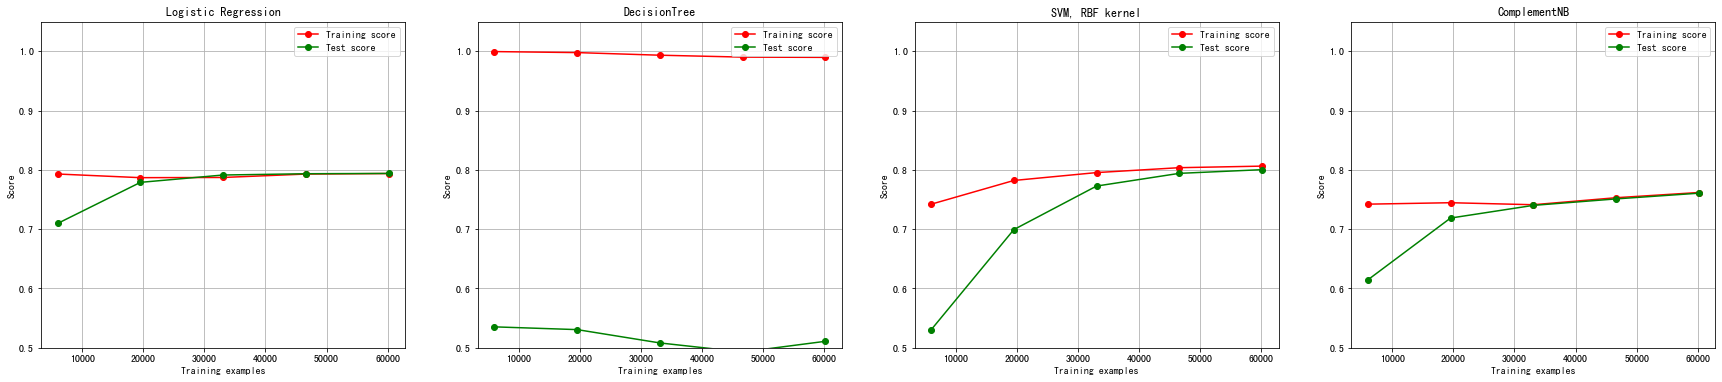

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import ComplementNB                                 #补集朴素贝叶斯
from sklearn.svm import SVC                                                  #SVM    
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve #画学习曲线的类
from sklearn.model_selection import ShuffleSplit #设定交叉验证模式的类
from time import time
import datetime
%matplotlib inline

pipe_LR = Pipeline([("scaler", StandardScaler()),
                    ("lr_clf", LR(C=0.1,solver="lbfgs",class_weight='balanced')  )  #逻辑回归对象，设置参数C=0.1,solver="lbfgs",class_weight='balanced'
                   ])                                                        

pipe_DTC = Pipeline([("scaler", StandardScaler()),
                    ("dtc_clf", DTC(max_depth=20,class_weight='balanced')  )  #决策树对象，设置参数max_depth=20,class_weight='balanced'
                    ])                                                      

pipe_SVC = Pipeline([("scaler", StandardScaler()),
                    ("svc_clf", SVC(gamma=0.01,C=0.1, class_weight='balanced')  ) #支持向量机对象，设置参数gamma=0.01,C=0.1, class_weight='balanced'
                    ])                                                      

pipe_ComplementNB = Pipeline([("scaler", MinMaxScaler()),
                              ("cnb_clf", ComplementNB()  ) #补集朴素贝叶斯对象
                             ])                                             


title = ["Logistic Regression","DecisionTree","SVM, RBF kernel","ComplementNB",]
models = [pipe_LR,pipe_DTC,pipe_SVC,pipe_ComplementNB]

fig, axes = plt.subplots(1,4,figsize=(30,6))
for ind, title_, estimator in zip(range(len(title)),title,models):
    times = time()
    plot_learning_curve(estimator, title_, X, y,
                        ax=axes[ind], ylim = [0.5, 1.05],n_jobs=-1, cv=2,scoring='roc_auc')
    print("{}运行时间:{}".format(title_,datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))
plt.show()

在学习曲线基础上，从偏差和方差两方面来对四类分析算法分析过拟合和欠拟合现象：
1. 过拟合：
LR可以看出偏差比较大，而方差比较小，算法的过拟合现象比较良好
DTC训练集的偏差比较小，而方差比较大，明显有这较大的过拟合现象
SVM的图可以看出算法偏差比较大，同时方差略大，过拟合现象一般
ComplementNB可以看出偏差比较小，方差良好，过拟合现象比较小

2. 欠拟合：
从四中算法的图中训练集均在测试集上方
可以看出四种算法的欠拟合现象都比较良好
